# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import OrdinalEncoder
import sklearn.metrics as metrics
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

## Dataset Information

###### Abstract: 

> - Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.



###### Data Set Information:

> - The dataset consists of feature vectors belonging to 12,330 sessions.
> - The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.


###### Attribute Information:

> The dataset consists of 10 numerical and 8 categorical attributes.
> The 'Revenue' attribute can be used as the class label.

> - "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

> - The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

> - The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

> - The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 

> - The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

> - The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

> - The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Research Questions 

**Hypothesis**: Classifying by purchase outcome - One possible hypothesis is that the data can be classified based on whether or not a customer made a purchase. This could reveal patterns or characteristics that are associated with successful conversions.


**Goal**: A model used to predict whether a customer will make a purchase or not based on their browsing behavior


## Data Preparation

In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [3]:
df['total_page'] = df['Administrative'] + df['Informational'] + df['ProductRelated']

In [4]:
df['total_duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

## Data Cleansing

As there is no null values found, the authors skip the Data Cleansing step.

## Data Exploratory 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


### Univariate Analysis

In [6]:
def plot_data_count(df, col, return_pct_share=True, hue=None, figsize=(12,6)):

    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12)
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    
    plt.show()
    
    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(df[col].value_counts(normalize=True)*100)

#### Revenue:

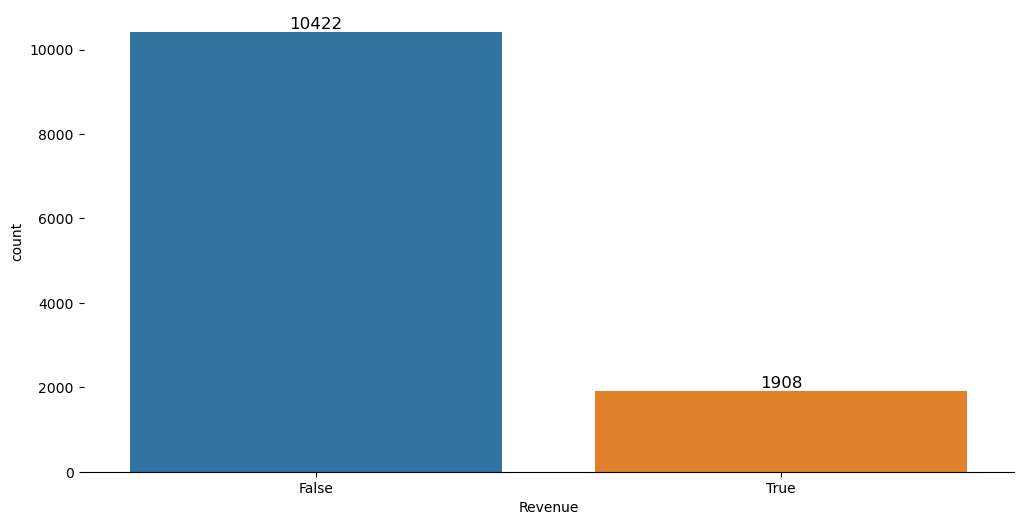



Percent share for each category:
False    84.525547
True     15.474453
Name: Revenue, dtype: float64


In [13]:
plot_data_count(df, 'Revenue')

#### Visitor Type:

In [ ]:
plot_data_count(df, 'VisitorType')

#### Weekend:

In [ ]:
plot_data_count(df, 'Weekend')

#### Operaing System:

In [ ]:
plot_data_count(df, 'OperatingSystems')

#### Special Day:

In [ ]:
plot_data_count(df, 'SpecialDay')

#### Total page, total duration, bounce rates, exit rates, page values:

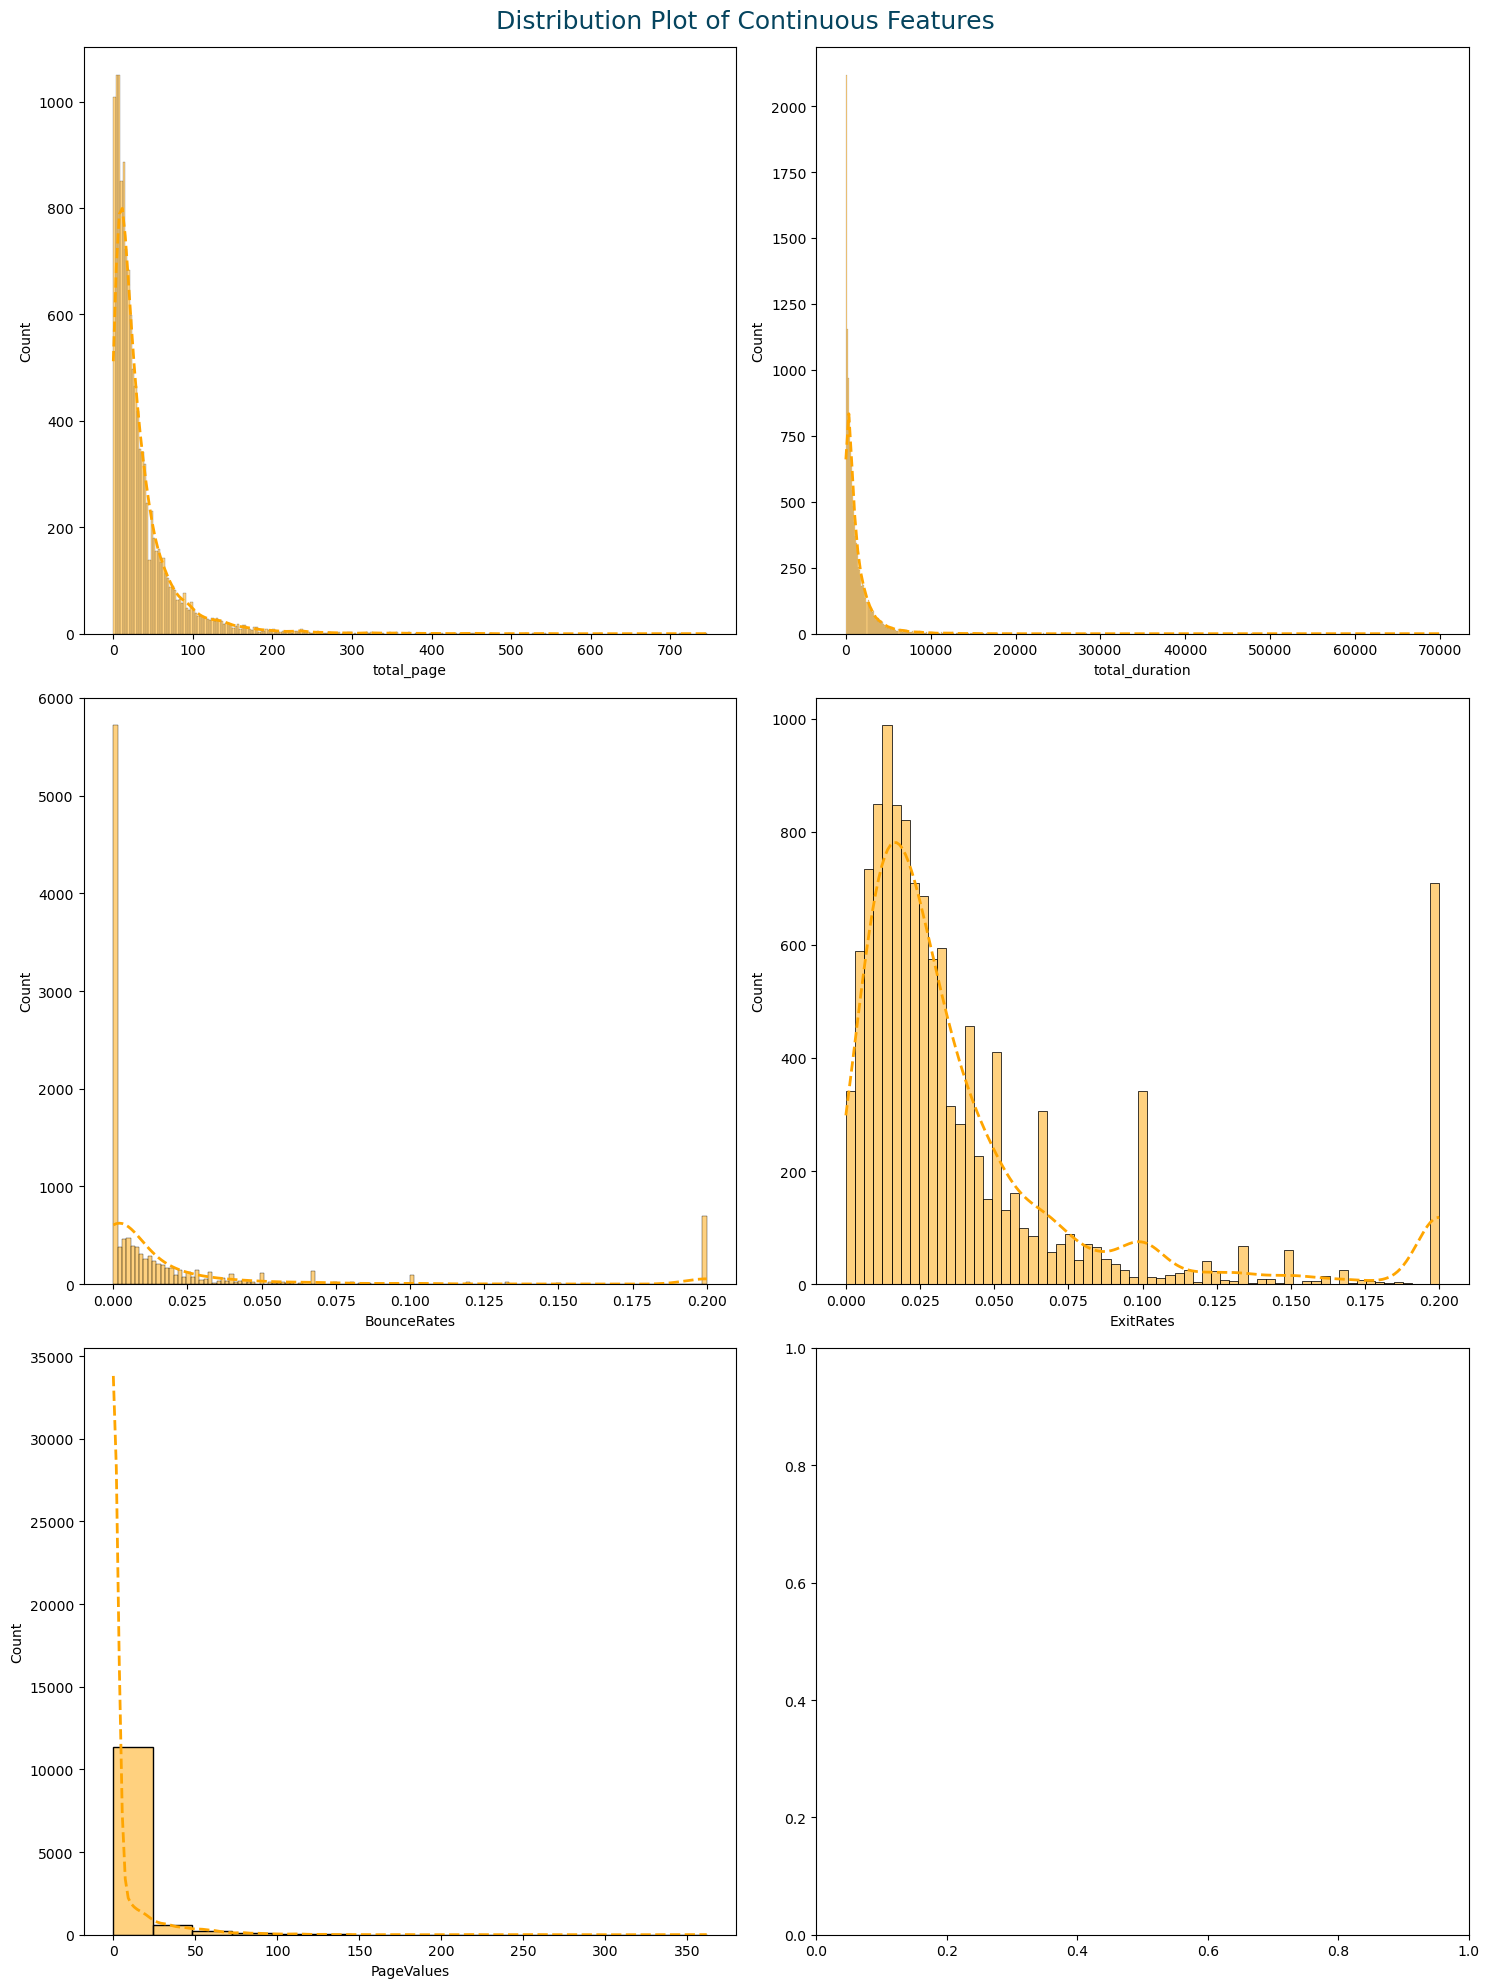

In [7]:
continuous_features = ['total_page',
                       'total_duration',
                       'BounceRates', 
                       'ExitRates', 
                       'PageValues']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
axs = np.ravel(axs)
for i, col in enumerate(continuous_features):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, line_kws={'lw':2, 'ls':'--'}, color='orange')

plt.suptitle("Distribution Plot of Continuous Features", fontsize=18, color='#05445E', va='bottom')
plt.tight_layout()
plt.show()

In [8]:
df[continuous_features].describe()

,total_page,total_duration,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,34.550203,1310.037228,0.022191,0.043073,5.889258
std,46.514053,2037.801702,0.048488,0.048597,18.568437
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,222.000000,0.000000,0.014286,0.000000
50%,20.000000,680.000000,0.003112,0.025156,0.000000
75%,42.000000,1626.908333,0.016813,0.050000,0.000000
max,746.000000,69921.647230,0.200000,0.200000,361.763742


Text(0.5, 1.0, 'Correlation Matrix of Data')

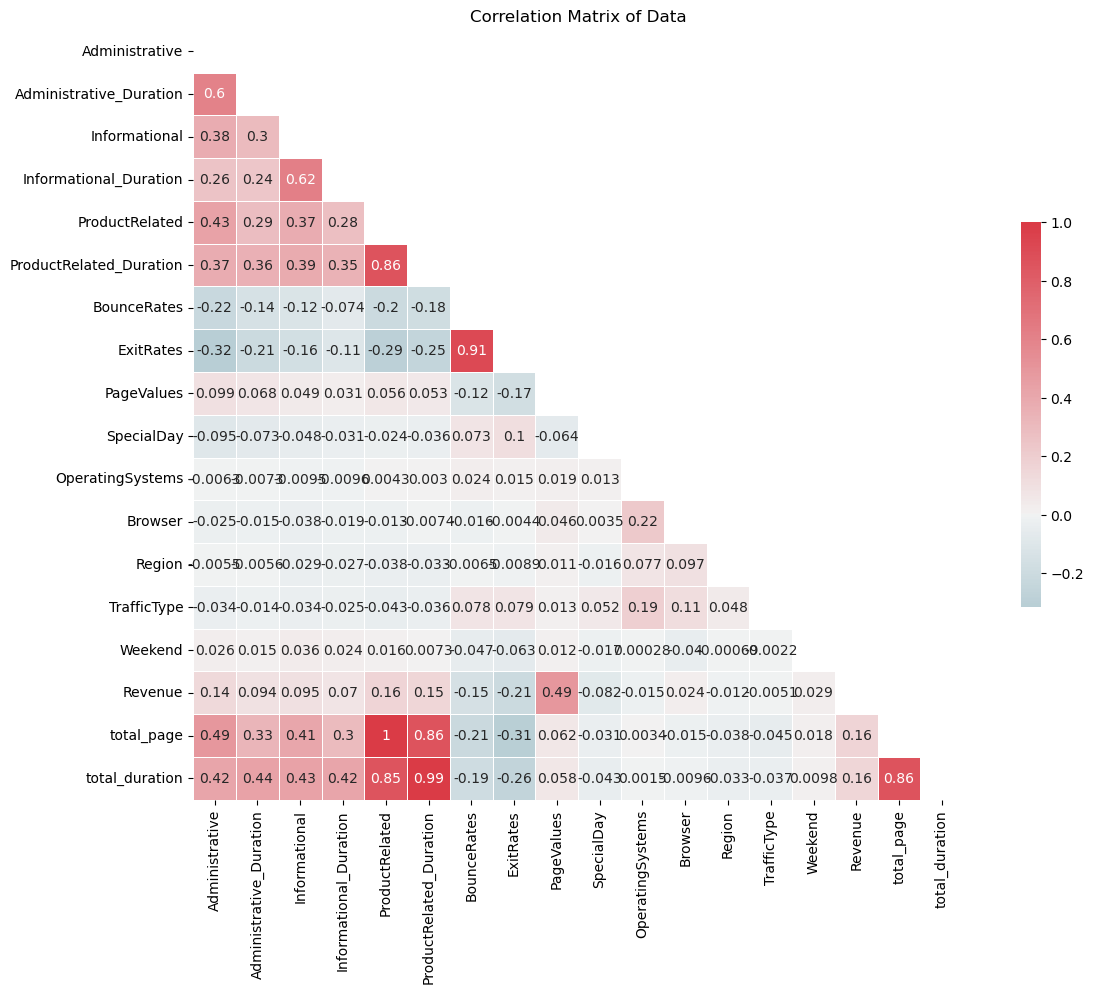

In [12]:
# Correlation matrix for all variables
corr = df.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (15, 10))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

# Feature Engineering

In [14]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_page,total_duration
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,1,0.000000
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,2,64.000000
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,1,0.000000
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2,2.666667
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,10,627.500000


### Feature Encoding:

In [15]:
ordinal_encoder = OrdinalEncoder()
df[['VisitorType']] = ordinal_encoder.fit_transform(df[['VisitorType']])

### Oversampling:

In [16]:
# preparing features 
X = df[['total_page', 'total_duration', 'BounceRates', 'ExitRates', 'PageValues', 'VisitorType']]

y = df[['Revenue']]

In [51]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

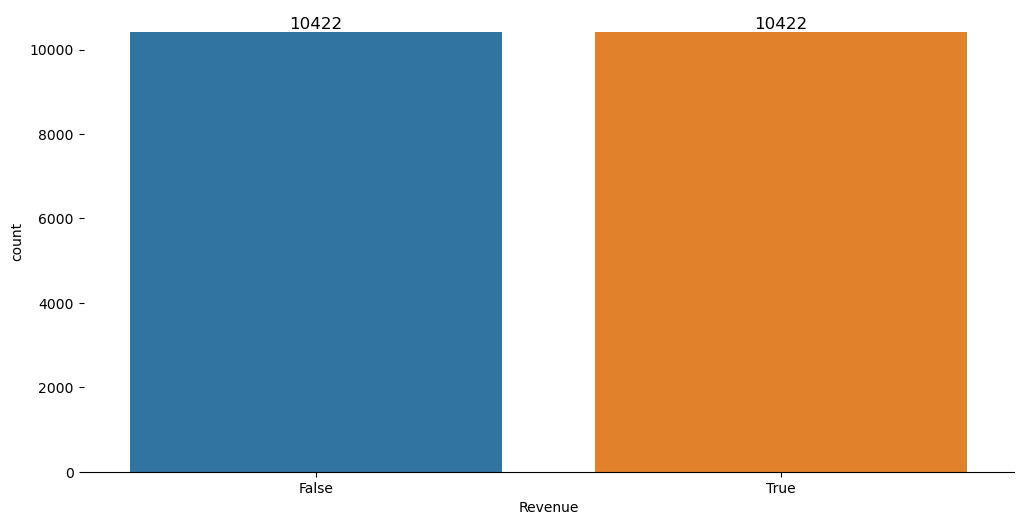



Percent share for each category:
False    50.0
True     50.0
Name: Revenue, dtype: float64


In [52]:
plot_data_count(y_resampled, 'Revenue')

## Modelling 

### Logistic Regression 

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 10)

In [54]:
# Fitting the training data to our model
from sklearn.linear_model import LogisticRegression
logregressor_model = LogisticRegression(random_state = 10)
logregressor_model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [55]:
#check prediction score
logregressor_model.score(X_test, y_test)

0.8121202430444515

### Random Forest 

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(random_state = 10)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [57]:
rfc_model.score(X_test, y_test)

0.9513911096897986

### Gradient Boosting

In [58]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Building the model
xgb_model = xgb.XGBClassifier(max_depth=5, n_estimators=50, learning_rate=0.1, random_state = 10)

# Training the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

In [59]:
xgb_model.score(X_test, y_test)

0.85865046370323

## Evaluation

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# create a list of the models
models = [logregressor_model, rfc_model, xgb_model]
model_names = ["Logistic Regression", "Random Forest", "XGBoost"]

# create a list of the evaluation metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# create an empty dataframe to store the results
results = pd.DataFrame(columns=["Model", *metrics])

# iterate over the models
for i, model in enumerate(models):
    # make predictions on the test set
    y_pred = model.predict(X_test)
    
    # calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # store the results in the dataframe
    results.loc[i] = [model_names[i], accuracy, precision, recall, f1]

# print the results
results

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.812120,0.873816,0.732529,0.796959
1,Random Forest,0.951391,0.915546,0.995235,0.953729
2,XGBoost,0.858650,0.868250,0.847840,0.857923


# Conclusion

Random Forest is the best model for prediction

## Prediction

In [63]:
pred = rfc_model.predict(X_test)

In [ ]:
pred.to_csv('osi-classification-prediction.csv')